In [2]:
from bs4 import BeautifulSoup
import requests

url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"

html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')

In [3]:
pages = range(1, 11)

results = []
for page in pages :
    url = "http://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody> tr')
    
    for channel in channel_list:
        category = channel.select('p.category')[0].text.strip()
        title = channel.select('h1 > a')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        
        data = [title, category, subscriber, view, video]
        results.append(data)

In [4]:
import pandas as pd

df = pd.DataFrame(results)
df.columns = ["title", "category", "subscriber", "view", "video"]
df.to_excel('/users/monsieur/Jupyter Notebook/youtube_rank.xlsx', index=False)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name() 
    rc('font', family = font_name)
elif platform.system() == 'Darwin': 
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [7]:
df = pd.read_excel('/users/monsieur/Jupyter Notebook/youtube_rank.xlsx')
df.head()
df.tail()
df["replaced_subscriber"] = df["subscriber"].str.replace("만", "0000")
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6410만,190억1809만,371개,64100000
1,HYBE LABELS,[음악/댄스/가수],6040만,187억5681만,655개,60400000
2,BANGTANTV,[음악/댄스/가수],5650만,122억1297만,"1,580개",56500000
3,SMTOWN,[음악/댄스/가수],2850만,219억1233만,"3,729개",28500000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [9]:
df["replaced_subscriber"] = df["replaced_subscriber"].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [10]:
pivot_df = df.pivot_table(index="category", values="replaced_subscriber", aggfunc = ["sum", "count"])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],97640000,71
[IT/기술/컴퓨터],7960000,8
[TV/방송],229930000,146
[게임],67190000,74
[교육/강의],23450000,22


In [11]:
pivot_df.columns = ["subscriber_sum", "category_count"]
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],97640000,71
[IT/기술/컴퓨터],7960000,8
[TV/방송],229930000,146
[게임],67190000,74
[교육/강의],23450000,22


In [12]:
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],97640000,71
1,[IT/기술/컴퓨터],7960000,8
2,[TV/방송],229930000,146
3,[게임],67190000,74
4,[교육/강의],23450000,22


In [13]:
pivot_df = pivot_df.sort_values(by="subscriber_sum", ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],674990000,171
17,[키즈/어린이],257850000,88
2,[TV/방송],229930000,146
11,[음식/요리/레시피],180710000,85
7,[미분류],143680000,114


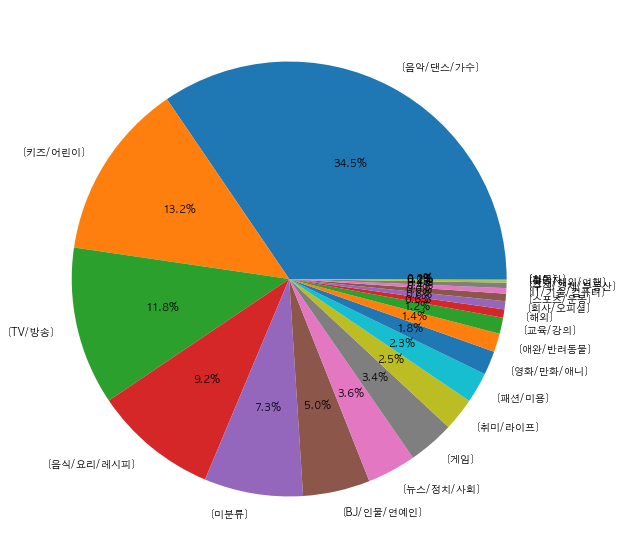

In [14]:
plt.figure(figsize = (20,10))
plt.pie(pivot_df["subscriber_sum"], labels=pivot_df["category"], autopct='%1.1f%%')
plt.show()

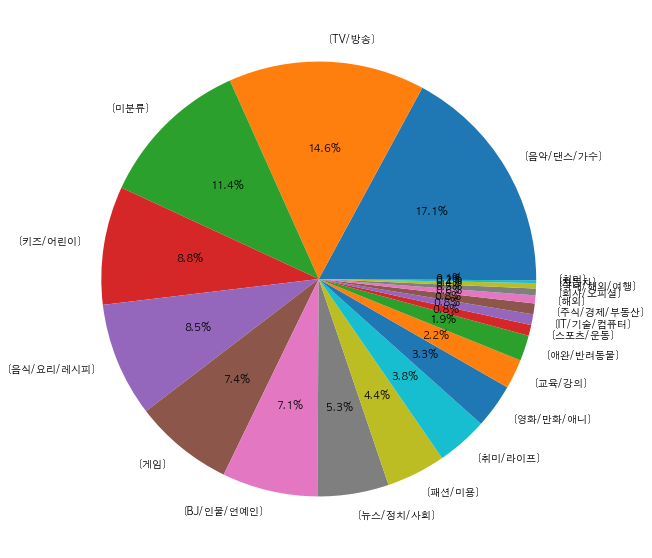

In [15]:
pivot_df = pivot_df.sort_values(by="category_count", ascending=False)
pivot_df.head()

plt.figure(figsize = (20,10))
plt.pie(pivot_df["category_count"], labels=pivot_df["category"], autopct='%1.1f%%')
plt.show()